<a href="https://colab.research.google.com/github/andrea77657/Space_sys_eng_ETH2024/blob/main/IML_IntroductionToPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up your environment

For today's class..

* Open the file linked (use QR-Code)
* File->Save a copy in Drive.

# Numpy

[Quickstart](https://numpy.org/doc/stable/user/quickstart.html)

In [ ]:
import numpy as np

In [ ]:
a = np.arange(15,100,10)
print(a)

[15 25 35 45 55 65 75 85 95]


In [ ]:

a = a.reshape(5, 3)
print(a)
print(1000*1000*3)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
3000000


In [ ]:
b = np.random.randn(5, 3)
print(b)

[[-0.45392925 -0.37415849 -1.22954628]
 [-0.6693105   1.22888334  0.39316686]
 [ 0.07216873  0.11892023 -0.76982783]
 [ 1.0917032   1.35663642  0.04376768]
 [ 0.73544201  0.87059452  1.05955836]]


In [ ]:
b[2]

array([ 0.07216873,  0.11892023, -0.76982783])

In [ ]:
b[2, :]

array([ 0.07216873,  0.11892023, -0.76982783])

In [ ]:
b[0][1]

np.float64(-0.3741584855085134)

In [ ]:
b[:, 1]

array([-0.37415849,  1.22888334,  0.11892023,  1.35663642,  0.87059452])

In [ ]:
b[:, 1][-1]

np.float64(0.8705945211467035)

In [ ]:
b

array([[-0.45392925, -0.37415849, -1.22954628],
       [-0.6693105 ,  1.22888334,  0.39316686],
       [ 0.07216873,  0.11892023, -0.76982783],
       [ 1.0917032 ,  1.35663642,  0.04376768],
       [ 0.73544201,  0.87059452,  1.05955836]])

In [ ]:
c = np.vstack([b, [0.2, 0.2, 0.2]])

In [ ]:
c

array([[-0.45392925, -0.37415849, -1.22954628],
       [-0.6693105 ,  1.22888334,  0.39316686],
       [ 0.07216873,  0.11892023, -0.76982783],
       [ 1.0917032 ,  1.35663642,  0.04376768],
       [ 0.73544201,  0.87059452,  1.05955836],
       [ 0.2       ,  0.2       ,  0.2       ]])

In [ ]:
c.reshape(2, -1)

array([[-0.45392925, -0.37415849, -1.22954628, -0.6693105 ,  1.22888334,
         0.39316686,  0.07216873,  0.11892023, -0.76982783],
       [ 1.0917032 ,  1.35663642,  0.04376768,  0.73544201,  0.87059452,
         1.05955836,  0.2       ,  0.2       ,  0.2       ]])

In [ ]:
points  = c.reshape(-1, 2)
print(points)

[[-0.45392925 -0.37415849]
 [-1.22954628 -0.6693105 ]
 [ 1.22888334  0.39316686]
 [ 0.07216873  0.11892023]
 [-0.76982783  1.0917032 ]
 [ 1.35663642  0.04376768]
 [ 0.73544201  0.87059452]
 [ 1.05955836  0.2       ]
 [ 0.2         0.2       ]]


In [ ]:
import matplotlib.pyplot as plt


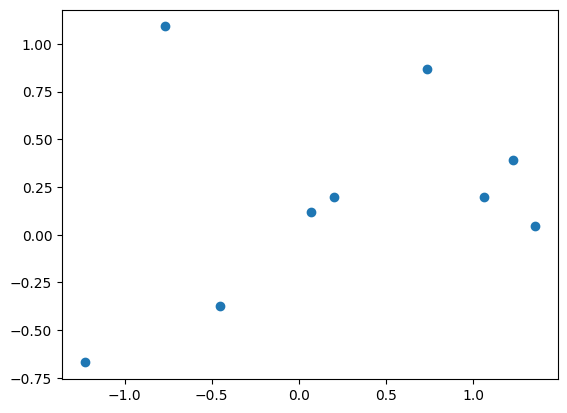

In [ ]:
plt.scatter(points[:, 0], points[:, 1])

# What is PyTorch?


*   [PyTorch](https://pytorch.org/) is a machine learning framework based on the Torch library.
*   Originally developed by Meta AI and now part of the Linux Foundation umbrella.
*   Free and open-source software released under the modified BSD license.


PyTorch provides many high-level features:

    Tensor computing (like NumPy) with acceleration via GPU
    Tape-based automatic differentiation system
    Deep Neural Network Building Blocks (layers, gradient descent, datasets)

$f(a,b) = 3a^3 - b^2$

$\frac{∂f}{∂a} = 9a^2$

$\frac{∂f}{∂b} = -2b$

$\frac{∂f}{∂f} = 1$

Computational Graph

Conceptually, autograd keeps a record of data (tensors) & all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

    run the requested operation to compute a resulting tensor, and

    maintain the operation’s gradient function in the DAG.

The backward pass kicks off when .backward() is called on the DAG root. autograd then:

    computes the gradients from each .grad_fn,

    accumulates them in the respective tensor’s .grad attribute, and

    using the chain rule, propagates all the way to the leaf tensors.

Below is a visual representation of the DAG in our example. In the graph, the arrows are in the direction of the forward pass. The nodes represent the backward functions of each operation in the forward pass. The leaf nodes in blue represent our leaf tensors a and b.
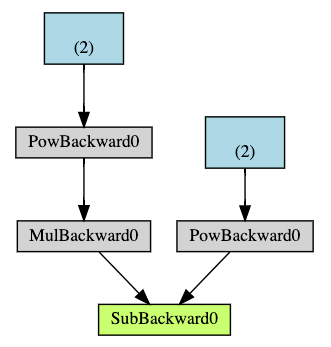

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
f = 3*torch.pow(a, 3) - torch.pow(b, 2)
f

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [ ]:
f.backward(torch.tensor([1., 1.]), retain_graph = False)
a.grad

tensor([36., 81.])

In [ ]:
9*a*a

tensor([36., 81.], grad_fn=<MulBackward0>)

In [ ]:
print(f.grad_fn)
print(f.grad_fn.next_functions)
print(f.grad_fn.next_functions[0][0].next_functions)
print(f.grad_fn.next_functions[1][0].next_functions)

((<MulBackward0 object at 0x78c6aea9ffd0>, 0), (<PowBackward0 object at 0x78c6aea9d360>, 0))
((<PowBackward0 object at 0x78c6aea9d420>, 0), (None, 0))
((<AccumulateGrad object at 0x78c6aea9d360>, 0),)


# Example Optimization PyTorch
Here we use PyTorch Tensors to fit a third order polynomial to sine function.


```
y_pred = a + b * x + c * x ** 2 + d * x ** 3
find a, b, c and d such that y_pred(x) approximates sin(x)
```


 We manually implement the forward and backward passes through the network:

0 14187.08203125
199 130.38441467285156
399 64.05119323730469
599 34.009090423583984
799 20.353607177734375
999 14.122517585754395
1199 11.267640113830566
1399 9.954092025756836
1599 9.347068786621094
1799 9.065285682678223
1999 8.933877944946289
Result: y = 0.008520536124706268 + 0.8637447953224182 x + -0.001469935174100101 x^2 + -0.09432663768529892 x^3


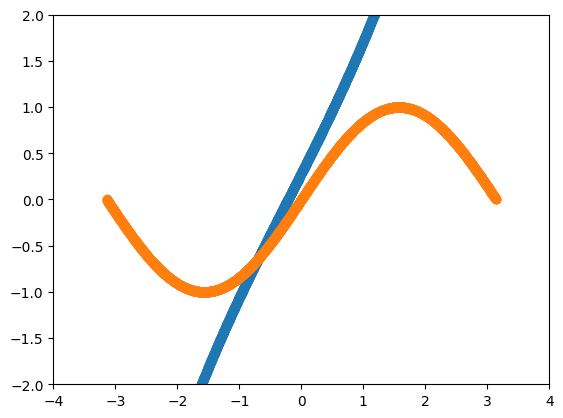

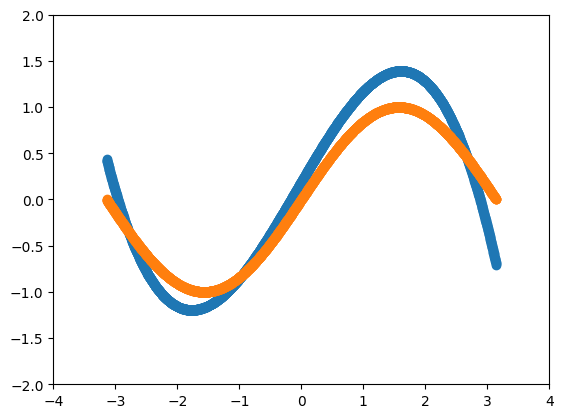

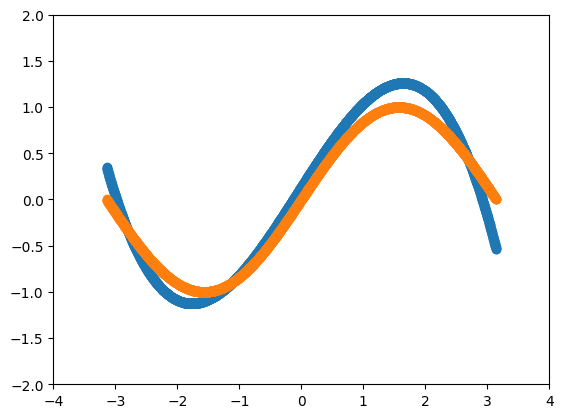

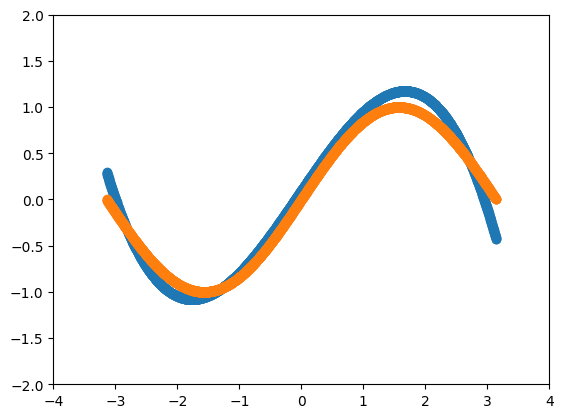

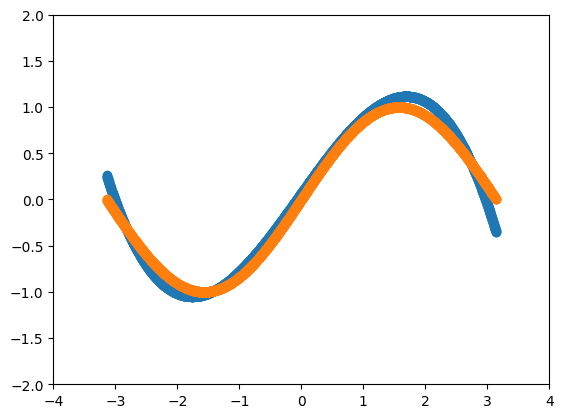

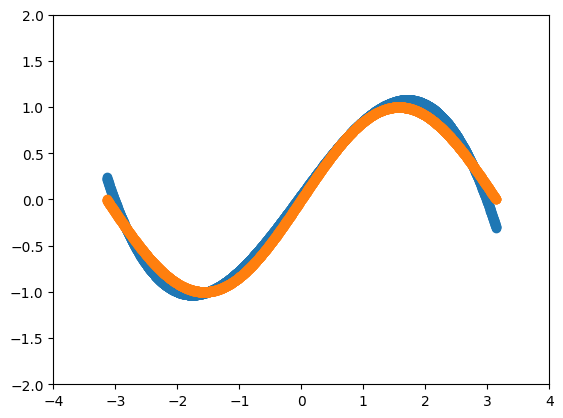

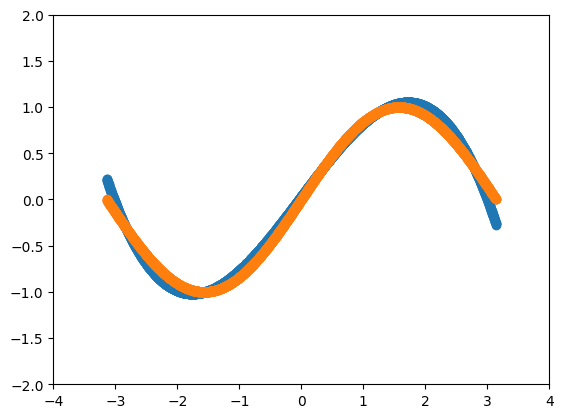

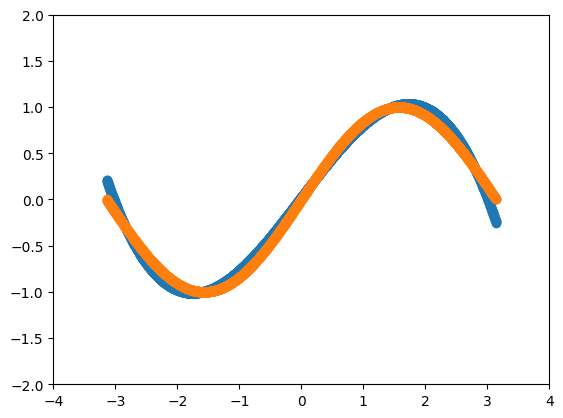

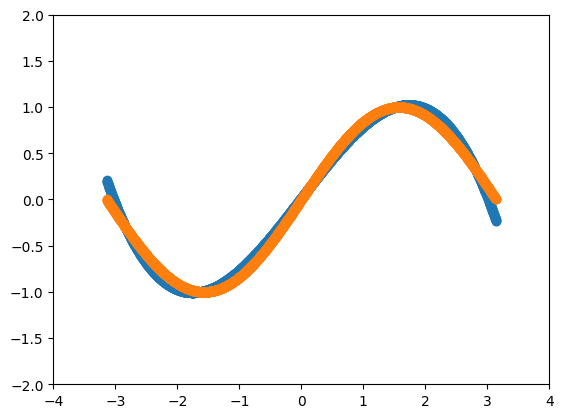

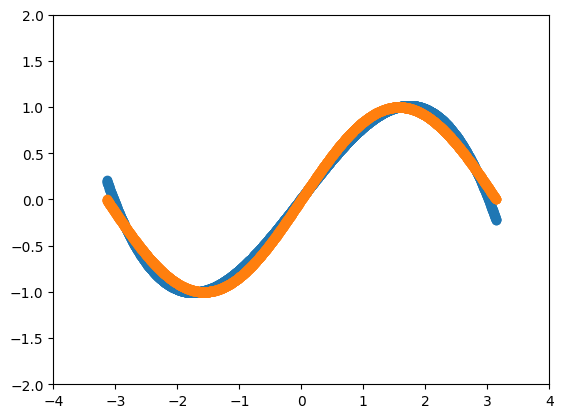

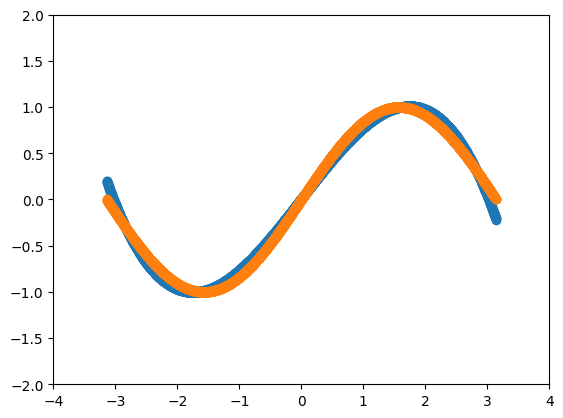

In [ ]:
import torch
import math
import matplotlib.pyplot as plt



dtype = torch.float
device = torch.device("cpu")

# Create random input and o it utput data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
train_losses = []
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 200 == 199 or t==0:
        print(t, loss)
        train_losses.append(loss)

        fig = plt.figure()
        ax = plt.axes()
        plt.xlim(-4, 4)
        plt.ylim(-2, 2)
        plt.autoscale(enable=False, axis='y')
        # plot the predicted function vs the original [sin(x)]
        plt.scatter(x, y_pred)
        plt.scatter(x, y)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
y_hat = a + b * x + c * x ** 2 + d * x ** 3

In [ ]:
y_hat

tensor([ 0.2052,  0.1992,  0.1932,  ..., -0.2050, -0.2111, -0.2172])

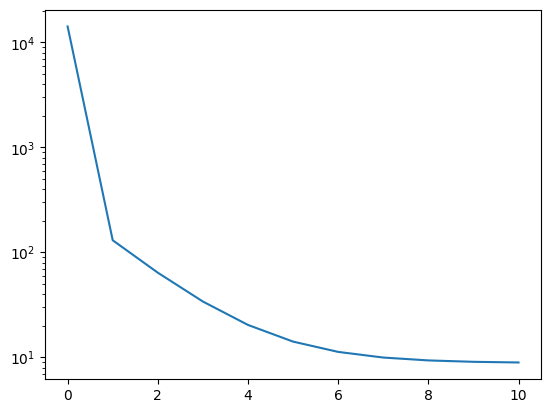

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.yscale('log')
plt.autoscale(enable=True, axis='y')
plt.plot(train_losses)

#With Autograd

In [ ]:
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t and t % 100 == 99:
        print(t, loss.item())
        fig = plt.figure()
        ax = plt.axes()
        plt.xlim(-4, 4)
        plt.ylim(-2, 2)
        plt.autoscale(enable=False, axis='y')
        # plot the predicted function vs the original [sin(x)]
        plt.scatter(x, y_pred.detach().numpy())
        plt.scatter(x, y)

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None



print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Basic Guidelines
* What are you trying to solve?
  * Regression vs Classification
* Analyze your data
  * reduce parameters, fix bad data, normalize
* Set up end-to-end pipeline first
* Do fancy stuff later: Data Augmentation, etc
* Data Loading and visualization
* Verify pipeline before training
* Training: overfit and then regularize
* Don't change too many hyperparameters at the same time
  *  Learning Rate, Batch Size etc
* Loss functions
  * L2, L1, Cross Entropy
* Evaluation:
  * plot and print
  * losses, predictions

# Data Example

![alt text](https://www.tensorflow.org/images/iris_three_species.jpg)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#----------DATA READING
filename = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')
print(csv_data.info())
print(csv_data.head(12))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   120         120 non-null    float64
 1   4           120 non-null    float64
 2   setosa      120 non-null    float64
 3   versicolor  120 non-null    float64
 4   virginica   120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB
None
    120    4  setosa  versicolor  virginica
0   6.4  2.8     5.6         2.2          2
1   5.0  2.3     3.3         1.0          1
2   4.9  2.5     4.5         1.7          2
3   4.9  3.1     1.5         0.1          0
4   5.7  3.8     1.7         0.3          0
5   4.4  3.2     1.3         0.2          0
6   5.4  3.4     1.5         0.4          0
7   6.9  3.1     5.1         2.3          2
8   6.7  3.1     4.4         1.4          1
9   5.1  3.7     1.5         0.4          0
10  5.2  2.7     3.9         1.4          1
11  6.9  3.1     4.9      

In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
#----------DATA CLEANUP
csv_data.columns = column_names # new_header #set the header row as the data header
print(csv_data.head())
# look at simple data statistics
print(csv_data.describe().transpose())

   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0
              count      mean       std  min    25%  50%    75%  max
sepal_length  120.0  5.845000  0.868578  4.4  5.075  5.8  6.425  7.9
sepal_width   120.0  3.065000  0.427156  2.0  2.800  3.0  3.300  4.4
petal_length  120.0  3.739167  1.822100  1.0  1.500  4.4  5.100  6.9
petal_width   120.0  1.196667  0.782039  0.1  0.300  1.3  1.800  2.5
species       120.0  1.000000  0.840168  0.0  0.000  1.0  2.000  2.0


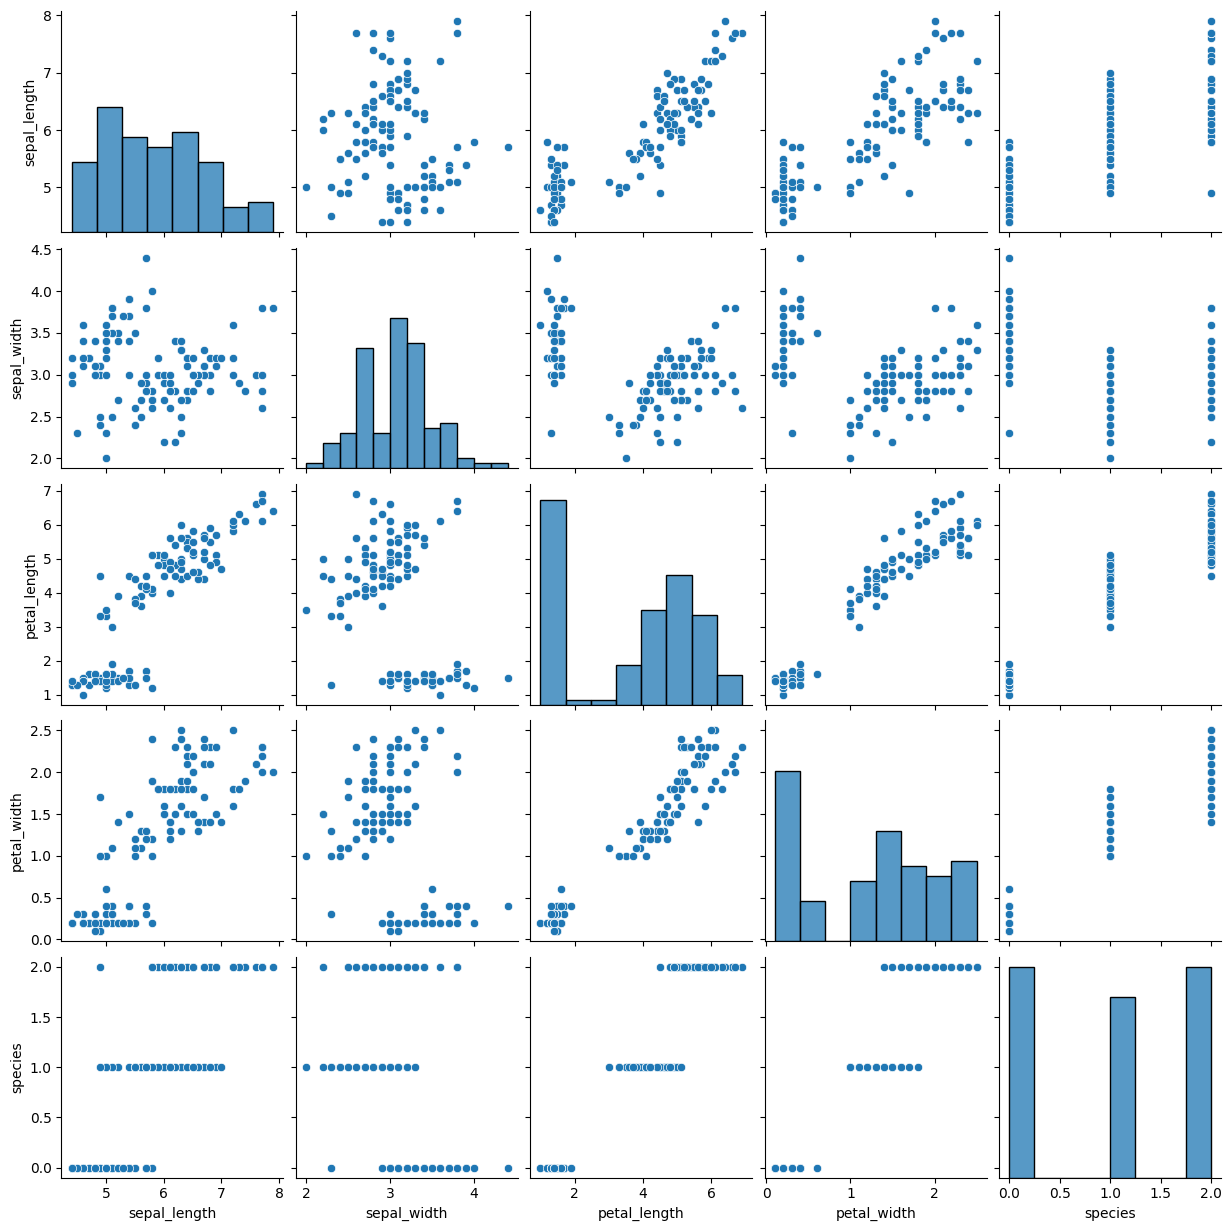

In [ ]:
# plot of all features against each other
sns.pairplot(csv_data)

In [ ]:
# a more informative plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(csv_data, hue='species')

In [ ]:
sns.violinplot(x='sepal_length', data=csv_data, cut=0)
plt.show()
sns.violinplot(x='sepal_width', data=csv_data, cut=0)
plt.show()
sns.violinplot(x='petal_length', data=csv_data, cut=0)
plt.show()
sns.violinplot(x='petal_width', data=csv_data, cut=0)
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(csv_data.corr(), annot=True)
plt.show()

In [ ]:
#----------TRAIN/TEST SPLIT
train_data = csv_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = csv_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features) for training
x_train = train_data.drop('species', axis=1)
y_train = train_data['species']
# normalize the training data
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())

# separate out the y (results) from x (features) testing
x_test = test_data.drop('species', axis=1)
y_test = test_data['species']
# normalize the test data
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min())

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
# Convert to Tensors
x_train = torch.FloatTensor(x_train.values)
x_test = torch.FloatTensor(x_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [ ]:
print(x_train, x_train.shape)

In [ ]:
# Build the model
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4,6)
        self.fc2 = nn.Linear(6,6)
        self.out = nn.Linear(6, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
mymodel = Model()
print(mymodel)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.01)

In [ ]:
epochs = 50
losses = []

for i in range(epochs):
    y_pred = mymodel.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Plot the loss
axes = plt.plot([i for i in range(epochs)], [item.item() for item in losses])
plt.show()

In [ ]:
torch.set_printoptions(sci_mode=False)
with torch.no_grad():
    mymodel.eval()
    y_pred = mymodel.forward(x_test)
    print(f'{y_pred=}')
    print('softmax:', y_pred.softmax(dim=1))
    y_hat = y_pred.argmax(dim=1)
    print(y_hat)

In [ ]:
df = pd.DataFrame({'Y': y_test, 'YHat': y_hat})
df['Correct'] = df['Y']==df['YHat']
print(df)

In [ ]:
100*df['Correct'].sum() / len(df)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(df['Y'], df['YHat']))

In [ ]:
cm = confusion_matrix(df['Y'], df['YHat'], labels=[0, 1, 2])

In [ ]:
sns.heatmap(cm, annot=True)

## 🌀 Spiral Data Equations (Two-Class)

We use parametric equations in **polar coordinates**, then convert to Cartesian `(x, y)`.

Let:

- θ ∈ [0, 4π] — the angle (controls the spiral twist)
- r = θ — the radius increases linearly with θ
- Add Gaussian noise ε ~ N(0, σ²)

---

### 🔴 Spiral for Class 0:
\[
\begin{aligned}
x &= r \cdot \cos(\theta) + \varepsilon_x = \theta \cdot \cos(\theta) + \varepsilon_x \\
y &= r \cdot \sin(\theta) + \varepsilon_y = \theta \cdot \sin(\theta) + \varepsilon_y
\end{aligned}
\]

---

### 🔵 Spiral for Class 1 (Mirrored):
\[
\begin{aligned}
x &= r \cdot \cos(\theta + \pi) + \varepsilon_x = -\theta \cdot \cos(\theta) + \varepsilon_x \\
y &= r \cdot \sin(\theta + \pi) + \varepsilon_y = -\theta \cdot \sin(\theta) + \varepsilon_y
\end{aligned}
\]

---

### Notes:
- The noise (ε) makes the classification non-trivial.
- These spirals are **nonlinearly separable** —


In [ ]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Generate synthetic spiral-like data
def make_spiral(n_samples=1000, noise=0.2):
    n = np.sqrt(np.random.rand(n_samples,1)) * 4*np.pi
    d1x = -np.cos(n)*n + np.random.rand(n_samples,1)*noise
    d1y = np.sin(n)*n + np.random.rand(n_samples,1)*noise
    X1 = np.hstack((d1x,d1y))
    Y1 = np.zeros(n_samples)

    d2x = np.cos(n)*n + np.random.rand(n_samples,1)*noise
    d2y = -np.sin(n)*n + np.random.rand(n_samples,1)*noise
    X2 = np.hstack((d2x,d2y))
    Y2 = np.ones(n_samples)

    X = np.vstack((X1, X2))
    Y = np.hstack((Y1, Y2))
    return X, Y

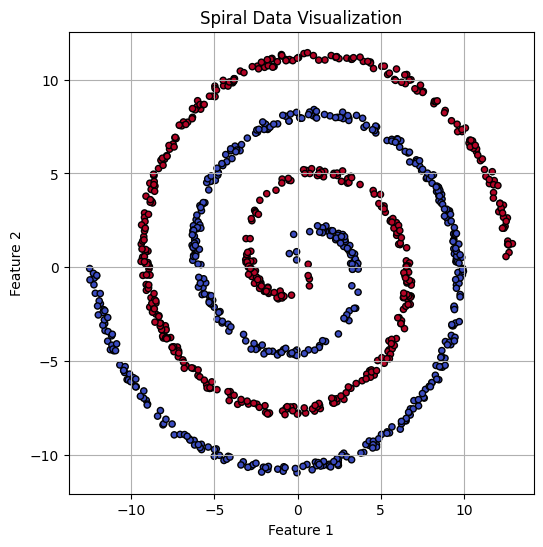

In [ ]:
# Plot the spiral
X, y = make_spiral(500, noise=0.5)
# Visualize the generated spiral data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=20)
plt.title("Spiral Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

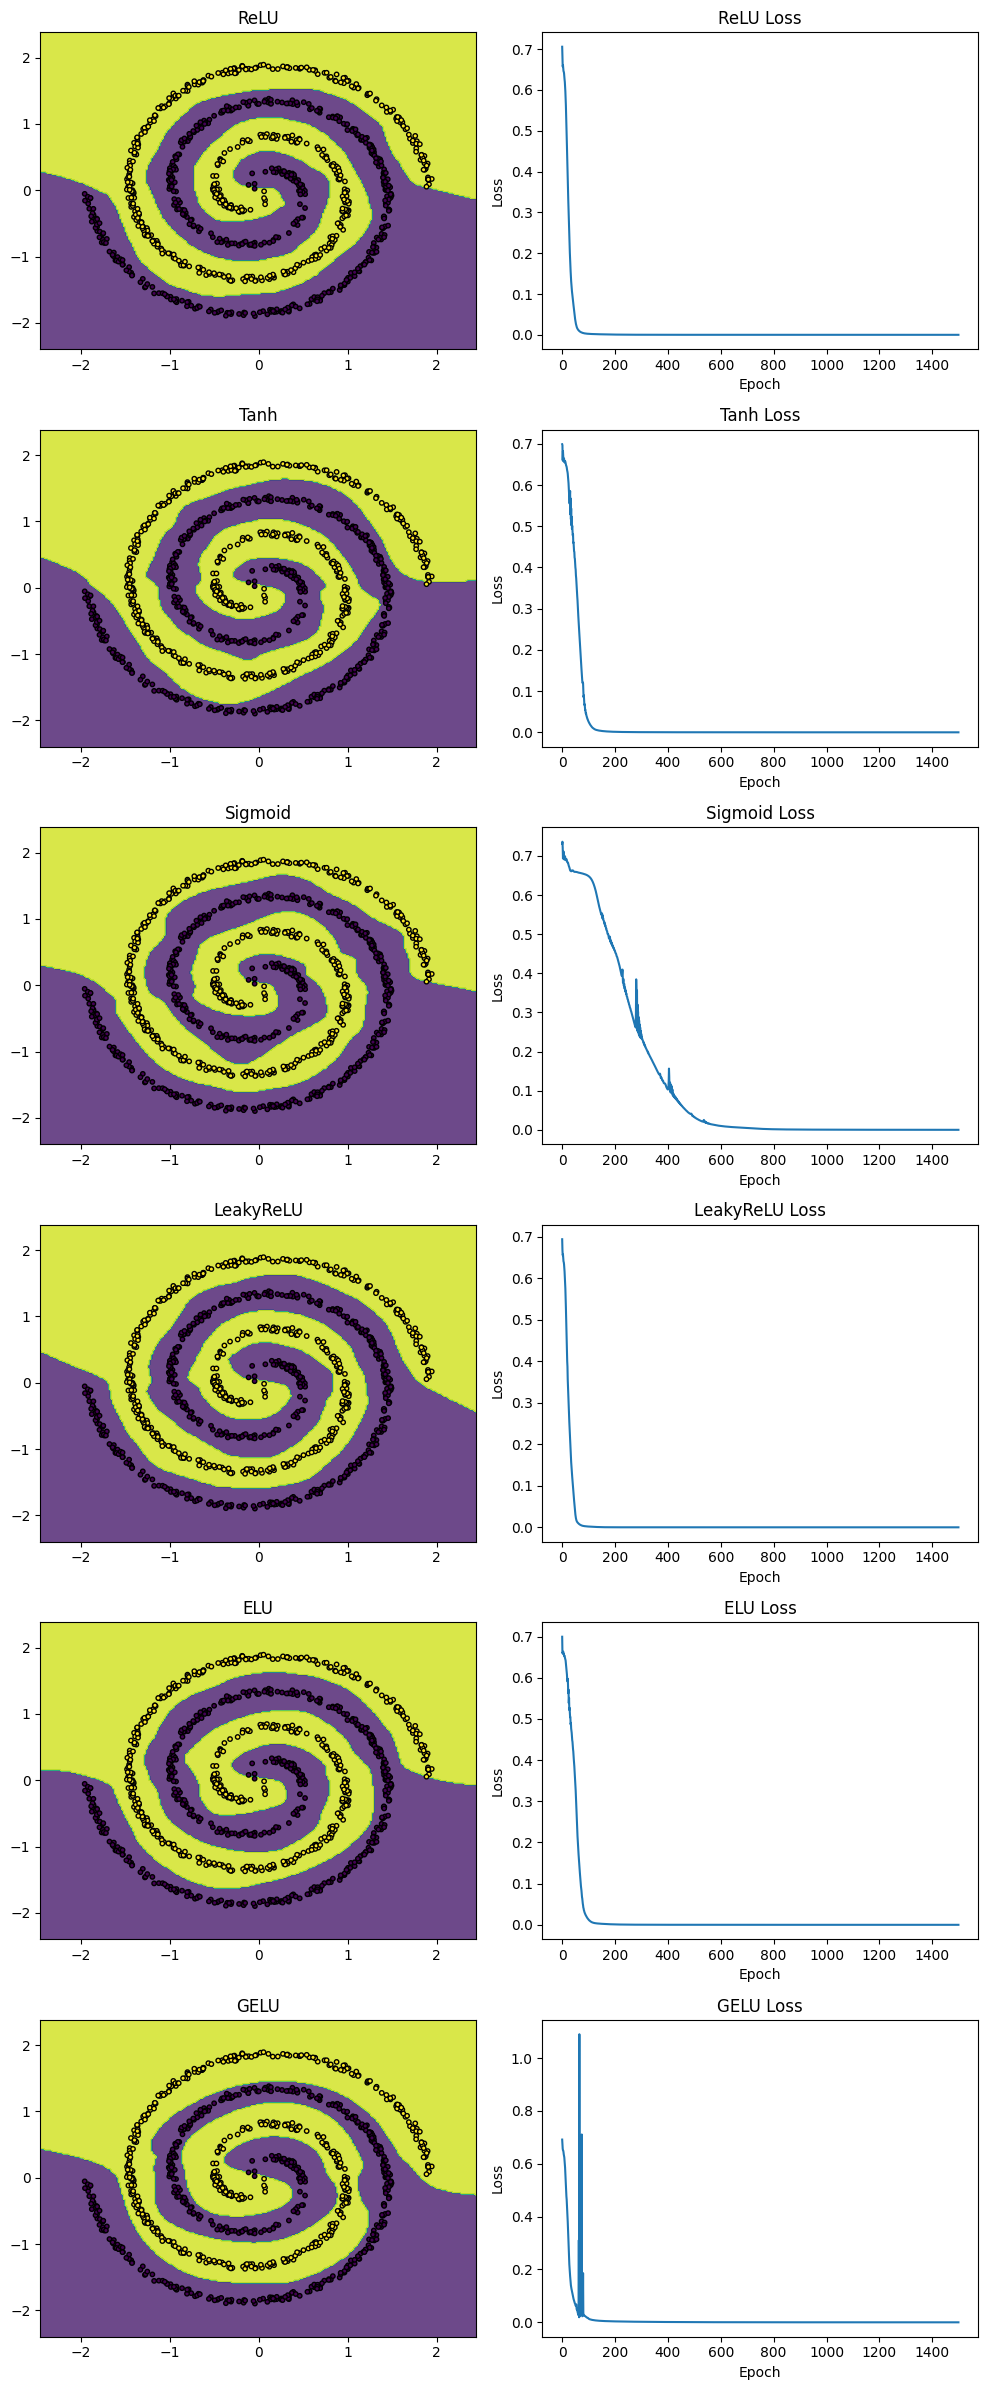

In [ ]:
 import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Define MLP model with a given activation function
class MLP(nn.Module):
    def __init__(self, num_nodes=64, activation_fn=nn.ReLU):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, num_nodes),
            activation_fn(),
            nn.Linear(num_nodes, num_nodes),
            activation_fn(),
            nn.Linear(num_nodes, num_nodes),
            activation_fn(),
            nn.Linear(num_nodes, 2)
        )

    def forward(self, x):
        return self.model(x)

# Training + decision boundary + loss plotting
def train_and_plot(activation_fn, ax_boundary, ax_loss):
    model = MLP(64, activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    losses = []
    for epoch in range(1500):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Plot decision boundary
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = model(grid).detach().numpy()
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    ax_boundary.contourf(xx, yy, Z, alpha=0.8)
    ax_boundary.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=10)
    ax_boundary.set_title(activation_fn.__name__)

    # Plot loss curve
    ax_loss.plot(losses)
    ax_loss.set_title(f'{activation_fn.__name__} Loss')
    ax_loss.set_xlabel("Epoch")
    ax_loss.set_ylabel("Loss")


# Prepare data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# List of activations to compare
activation_functions = [nn.ReLU, nn.Tanh, nn.Sigmoid, nn.LeakyReLU, nn.ELU, nn.GELU]

# Set up subplots
n = len(activation_functions)
fig, axes = plt.subplots(n, 2, figsize=(10, 4 * n))

for i, act_fn in enumerate(activation_functions):
    train_and_plot(act_fn, axes[i][0], axes[i][1])

plt.tight_layout()
plt.show()


##  ELU & GELU – Activation Functions & Training Loss Behavior

We compare **ELU (Exponential Linear Unit)** and **GELU (Gaussian Error Linear Unit)** in terms of their mathematical forms and how they impact training loss in neural networks.

---

### Activation Functions

#### **ELU: Exponential Linear Unit**
$$
\text{ELU}(x) =
\begin{cases}
x & \text{if } x > 0 \\
\alpha (\exp(x) - 1) & \text{if } x \leq 0
\end{cases}
$$

- Introduces smooth negative values (unlike ReLU's hard cutoff at 0)
- Helps maintain gradient flow in negative regions
- Typically uses $\alpha = 1$

---

#### **GELU: Gaussian Error Linear Unit**
$$
\text{GELU}(x) = x \cdot \Phi(x)
$$

Where $ \Phi(x) $ is the cumulative distribution function (CDF) of the standard normal distribution:

$$
\Phi(x) = \frac{1}{2} \left(1 + \text{erf}\left( \frac{x}{\sqrt{2}} \right)\right)
$$

- Probabilistic activation (used in transformers like BERT)
- Smooth and non-linear
- Retains some of the input while suppressing outliers more softly than ReLU

---

### Training Loss Behavior

| Activation | Loss Curve | Convergence Speed | Comments |
|------------|------------|-------------------|----------|
| **ELU**    | Smooth, sharp drop | Fast | Good gradient flow, avoids dead neurons |
| **GELU**   | Smoothest, gradual drop | Medium | Very stable, but slightly slower to create sharp boundaries |
| **ReLU**   | Fast drop, sometimes plateau | Fast | Can die out in negative regions |
| **Sigmoid**| Very slow, often high loss | Slow | Suffers from vanishing gradients |

---

### Summary

- **ELU** often leads to **faster and deeper loss drops** compared to ReLU or Sigmoid
- **GELU** provides **smooth and stable learning**, even if it's slightly slower initially
- Both are **better than sigmoid** on complex, non-linear data like spirals

---


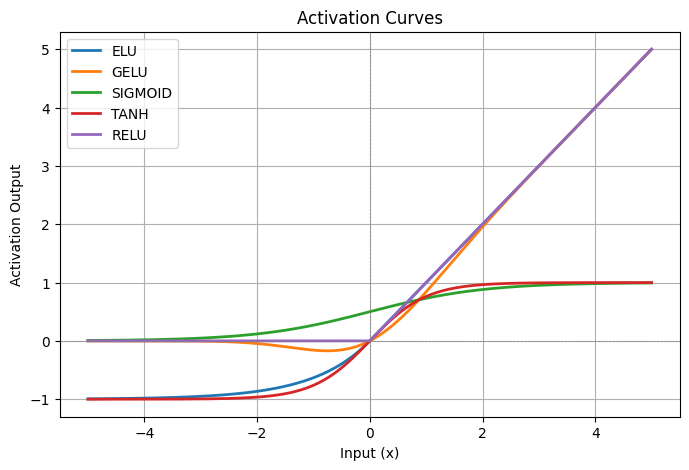

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

x = torch.linspace(-5, 5, 500)

elu = F.elu(x)
gelu = F.gelu(x)
sigmoid = F.sigmoid(x)
tanh = F.tanh(x)
relu = F.relu(x)

plt.figure(figsize=(8, 5))
plt.plot(x, elu, label="ELU", linewidth=2)
plt.plot(x, gelu, label="GELU", linewidth=2)
plt.plot(x, sigmoid, label="SIGMOID", linewidth=2)
plt.plot(x, tanh, label="TANH", linewidth=2)
plt.plot(x, relu, label="RELU", linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Activation Curves")
plt.xlabel("Input (x)")
plt.ylabel("Activation Output")
plt.legend()
plt.grid(True)
plt.show()


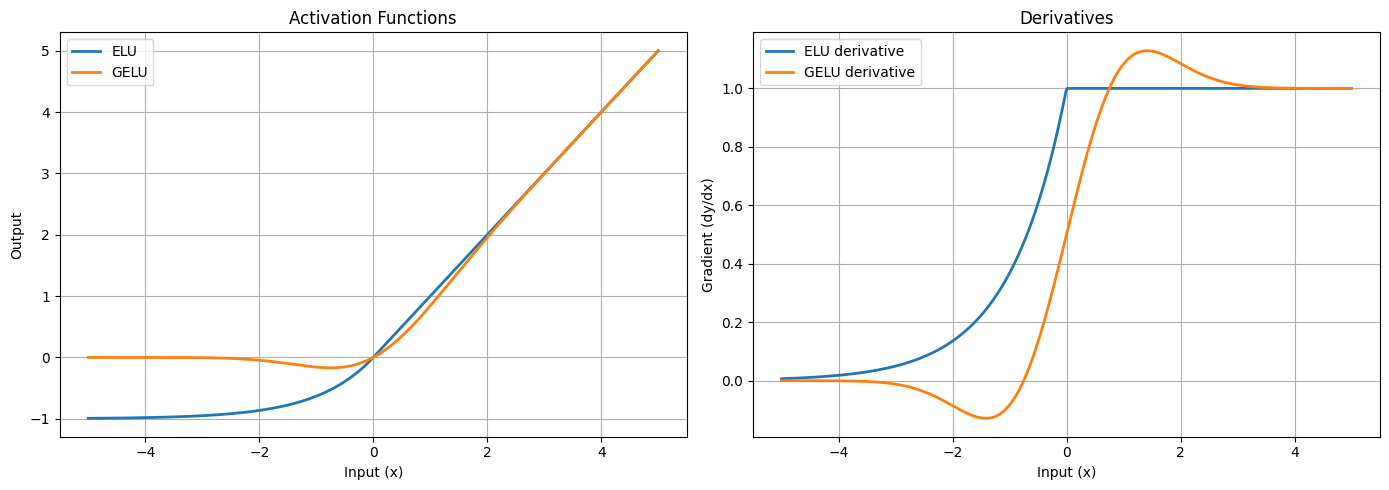

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Input range
x = torch.linspace(-5, 5, 500, requires_grad=True)

# --- Activation functions ---
elu = F.elu(x)
gelu = F.gelu(x)

# --- Derivatives ---
# Autograd to compute derivatives
grad_elu = torch.autograd.grad(elu.sum(), x, create_graph=True)[0]
grad_gelu = torch.autograd.grad(gelu.sum(), x, create_graph=True)[0]

# Convert to NumPy for plotting
x_np = x.detach().numpy()
elu_np = elu.detach().numpy()
gelu_np = gelu.detach().numpy()
d_elu_np = grad_elu.detach().numpy()
d_gelu_np = grad_gelu.detach().numpy()

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot activation functions
axs[0].plot(x_np, elu_np, label="ELU", linewidth=2)
axs[0].plot(x_np, gelu_np, label="GELU", linewidth=2)
axs[0].set_title("Activation Functions")
axs[0].set_xlabel("Input (x)")
axs[0].set_ylabel("Output")
axs[0].legend()
axs[0].grid(True)

# Plot their derivatives
axs[1].plot(x_np, d_elu_np, label="ELU derivative", linewidth=2)
axs[1].plot(x_np, d_gelu_np, label="GELU derivative", linewidth=2)
axs[1].set_title("Derivatives")
axs[1].set_xlabel("Input (x)")
axs[1].set_ylabel("Gradient (dy/dx)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
def print_mlp_structure(model):
    total_params = 0
    print("MLP Layer Summary:\n")

    for i, layer in enumerate(model.model):
        if isinstance(layer, nn.Linear):
            in_features = layer.in_features
            out_features = layer.out_features
            weight_params = layer.weight.numel()
            bias_params = layer.bias.numel() if layer.bias is not None else 0

            print(f"Layer {i}: Linear({in_features} → {out_features})")
            print(f"    Neurons: {out_features}")
            print(f"    Weights: {weight_params}")
            print(f"    Biases : {bias_params}\n")

            total_params += weight_params + bias_params

    print(f"Total Learnable Parameters: {total_params}")


In [ ]:
1000*1000*3


3000000

In [ ]:
model = MLP(64, nn.Sigmoid)
print_mlp_structure(model)

MLP Layer Summary:

Layer 0: Linear(2 → 64)
    Neurons: 64
    Weights: 128
    Biases : 64

Layer 2: Linear(64 → 64)
    Neurons: 64
    Weights: 4096
    Biases : 64

Layer 4: Linear(64 → 2)
    Neurons: 2
    Weights: 128
    Biases : 2

Total Learnable Parameters: 4482
